In [89]:
# Using the libraries required for below data operations

library(tidyverse)
library("rio")
library(lubridate)
library(readxl)
library(data.table)
library(gridExtra)
library(visdat)

In [74]:
# Converting the excel file to csv file

convert("Students in formal tertiary education 1965-2018.xlsx", "Students in formal tertiary education 1965-2018.csv")

New names:
* `` -> ...1
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ... and 2 more problems


In [75]:
# Read the data from csv file and remove the unwanted rows and columns from the dataframe 

data <- read.csv("Students in formal tertiary education 1965-2018.csv")
data <- data[-c(0,1,3,58:78),]
colnames(data)<- c() 

names(data) <- as.matrix(data[1, ])
data <- data[-1, ]
data[] <- lapply(data, function(x) type.convert(as.character(x))) # making the first row as the header of the dataframe
                 
data <- data[,-c(1)] 

# Removing the NA values and replacing with zero
data[is.na(data)] <- 0                 

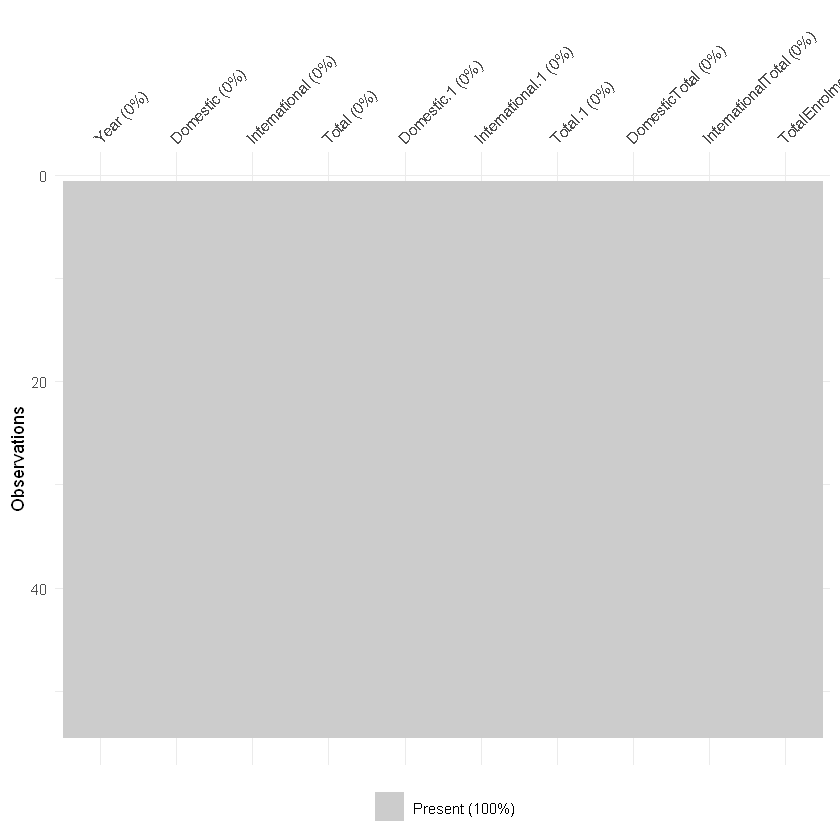

In [90]:
# vis_miss to see the data is complete without any missing or NA values

data %>% 
            vis_miss()

In [76]:
# Dataframe has two types of Domestic and International enrolment : Private and Public, so adding them to get the
# total enrolments

data$DomesticTotal <- data$Domestic + data$Domestic.1
data$InternationalTotal <- data$International + data$International.1
data$TotalEnrolment <- data$Total + data$Total.1

In [77]:
# selecting the required columns for the further usage and converting the column datatypes

education_df <- data %>% 
select(Year,TotalEnrolment)
education_df$Year <- as.numeric(education_df$Year)
education_df

,Year,TotalEnrolment
,<dbl>,<dbl>
4,1965,51613
5,1966,57450
6,1967,60658
7,1968,66690
8,1969,73934
9,1970,79839
10,1971,86708
11,1972,95092
12,1973,95965


In [48]:
# Writing the wrangled data to a csv file which will be merged using Julia with Crime Data

education_df %>%
write_csv("Education.csv")

In [78]:
# Reading the crime data from csv file 

crime <- read_excel("crime_data_nz.xlsx")

New names:
* `` -> ...2
* `` -> ...4
* `` -> ...6
* `` -> ...8
* `` -> ...10
* ... and 17 more problems


Year,...2,1994,...4,1995,...6,1996,...8,1997,...10,...,2010,...36,2011,...38,2012,...40,2013,...42,2014,...44
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Measure,NA,Recorded,Resolved,Recorded,Resolved,Recorded,Resolved,Recorded,Resolved,...,Recorded,Resolved,Recorded,Resolved,Recorded,Resolved,Recorded,Resolved,Recorded,Resolved
Offence,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Total Offences,NA,447525,171453,465052,170649,477596,175751,473547,176299,...,426345,202545,406056,190820,376013,176853,360411,158042,350389,145367
Homicide and related offences,NA,123,108,98,77,109,80,150,129,...,97,91,83,73,68,63,83,70,66,58
Acts intended to cause injury,NA,30159,23807,30976,24130,30554,23832,29762,23245,...,44515,37155,42278,35286,40851,32361,39447,29852,39944,28908
Sexual assault and related offences,NA,2633,1491,2575,1473,2783,1609,2281,1266,...,3016,1676,3466,1963,3512,1889,3919,2030,4056,1932
Dangerous or negligent acts endangering persons,NA,1353,836,1345,836,1359,858,1093,717,...,859,603,979,673,1022,655,787,456,737,434
"Abduction, harassment and other related offences against a person",NA,8944,5067,9071,5265,9303,5536,9611,5836,...,14157,9993,12947,9394,12476,8627,13763,8092,15024,8483
"Robbery, extortion and related offences",NA,1797,718,2022,784,2039,740,2264,868,...,2641,1088,2447,1057,2199,862,2178,849,2140,861


In [80]:
# Wrangling the crime data like transposing, removing unwanted rows and columns, renaming the columns
crime_df <- as.data.frame(t(crime))
names(crime_df) <- as.matrix(crime_df[1,])
crime_df <- crime_df[-1, ]
setDT(crime_df, keep.rownames = "Year")[]
crime_df

Year,Measure,Offence,Total Offences,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous or negligent acts endangering persons,"Abduction, harassment and other related offences against a person","Robbery, extortion and related offences","Unlawful entry with intent/burglary, break and enter",Theft and related offences,"Fraud, deception and related offences",Illicit drug offences,Prohibited and regulated weapons and explosives offences,Property damage and environmental pollution,Public order offences,"Offences against justice procedures, government security and government operations",Miscellaneous offences,data extracted on 10 Oct 2019 03:48 UTC (GMT) from NZ.Stat
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
...2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1994,Recorded,NA,447525,123,30159,2633,1353,8944,1797,78250,174504,28917,24417,5821,44326,33668,10333,2280,NA
...4,Resolved,NA,171453,108,23807,1491,836,5067,718,9335,37383,16085,22470,5026,12810,25725,8954,1638,NA
1995,Recorded,NA,465052,98,30976,2575,1345,9071,2022,77961,182818,35307,20824,5321,47837,35358,11270,2269,NA
...6,Resolved,NA,170649,77,24130,1473,836,5265,784,8757,36628,17442,19040,4497,13320,27028,9698,1674,NA
1996,Recorded,NA,477596,109,30554,2783,1359,9303,2039,80773,185725,35836,21908,5818,48641,37175,13031,2542,NA
...8,Resolved,NA,175751,80,23832,1609,858,5536,740,9158,36735,16594,20100,5028,13831,28625,11251,1774,NA
1997,Recorded,NA,473547,150,29762,2281,1093,9611,2264,80769,182786,30867,25735,6325,48122,36222,14848,2712,NA
...10,Resolved,NA,176299,129,23245,1266,717,5836,868,9209,35060,14528,22909,5507,13541,28355,13137,1992,NA


Year,Measure,Offence,Total Offences,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous or negligent acts endangering persons,"Abduction, harassment and other related offences against a person","Robbery, extortion and related offences","Unlawful entry with intent/burglary, break and enter",Theft and related offences,"Fraud, deception and related offences",Illicit drug offences,Prohibited and regulated weapons and explosives offences,Property damage and environmental pollution,Public order offences,"Offences against justice procedures, government security and government operations",Miscellaneous offences,data extracted on 10 Oct 2019 03:48 UTC (GMT) from NZ.Stat
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
...2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1994,Recorded,NA,447525,123,30159,2633,1353,8944,1797,78250,174504,28917,24417,5821,44326,33668,10333,2280,NA
...4,Resolved,NA,171453,108,23807,1491,836,5067,718,9335,37383,16085,22470,5026,12810,25725,8954,1638,NA
1995,Recorded,NA,465052,98,30976,2575,1345,9071,2022,77961,182818,35307,20824,5321,47837,35358,11270,2269,NA
...6,Resolved,NA,170649,77,24130,1473,836,5265,784,8757,36628,17442,19040,4497,13320,27028,9698,1674,NA
1996,Recorded,NA,477596,109,30554,2783,1359,9303,2039,80773,185725,35836,21908,5818,48641,37175,13031,2542,NA
...8,Resolved,NA,175751,80,23832,1609,858,5536,740,9158,36735,16594,20100,5028,13831,28625,11251,1774,NA
1997,Recorded,NA,473547,150,29762,2281,1093,9611,2264,80769,182786,30867,25735,6325,48122,36222,14848,2712,NA
...10,Resolved,NA,176299,129,23245,1266,717,5836,868,9209,35060,14528,22909,5507,13541,28355,13137,1992,NA


In [81]:
# Selecting the required columns and filtering only recorded offences from crime data

recorded_crime = crime_df %>%
select (-3,-20) %>% 
filter(Measure == "Recorded")

In [82]:
# changing the column data type to numeric and also removing the space from column names for ease

recorded_crime$Year <- as.numeric(recorded_crime$Year)
names(recorded_crime)<-str_replace_all(names(recorded_crime), c(" " = "." , "," = "" ))

In [83]:
# selecting only Year and Total Offences columns for exporting it into csv and using it for merging later

recorded_crime_df <- recorded_crime %>%
                       select(Year,Total.Offences)
recorded_crime_df$Total.Offences <- as.numeric(as.character(recorded_crime_df$Total.Offences))
recorded_crime_df

Year,Total.Offences
<dbl>,<dbl>
1994,447525
1995,465052
1996,477596
1997,473547
1998,461677
1999,438074
2000,427230
2001,426526
2002,440129


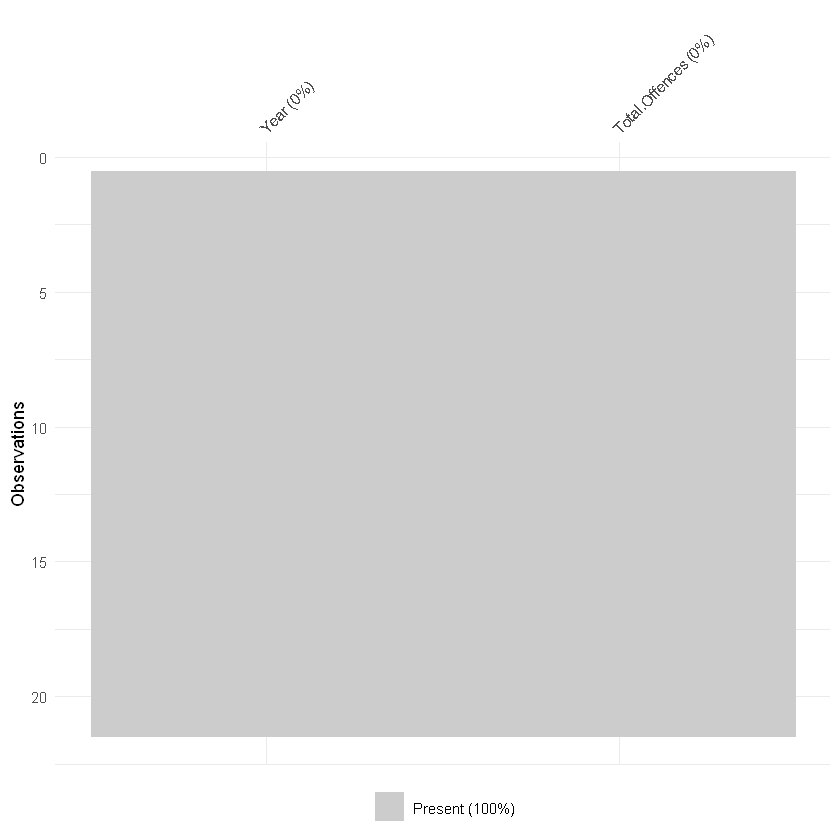

In [91]:
# vis_miss to see the data is complete without any missing or NA values

recorded_crime_df %>%
vis_miss()

In [84]:
# exporting the data using write_csv

recorded_crime_df %>%
write_csv("Crime.csv")

In [86]:
# Here we are using the merged file created using Julia and plotting the graphs to observe the relationship 
# between different factors

MergedData <- read_csv("MergedData.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Total.Offences = col_double(),
  TotalEnrolment = col_double(),
  UnemploymentRate = col_double(),
  Yearly_alcohol_consumption = col_double(),
  Avg_temperature = col_double()
)


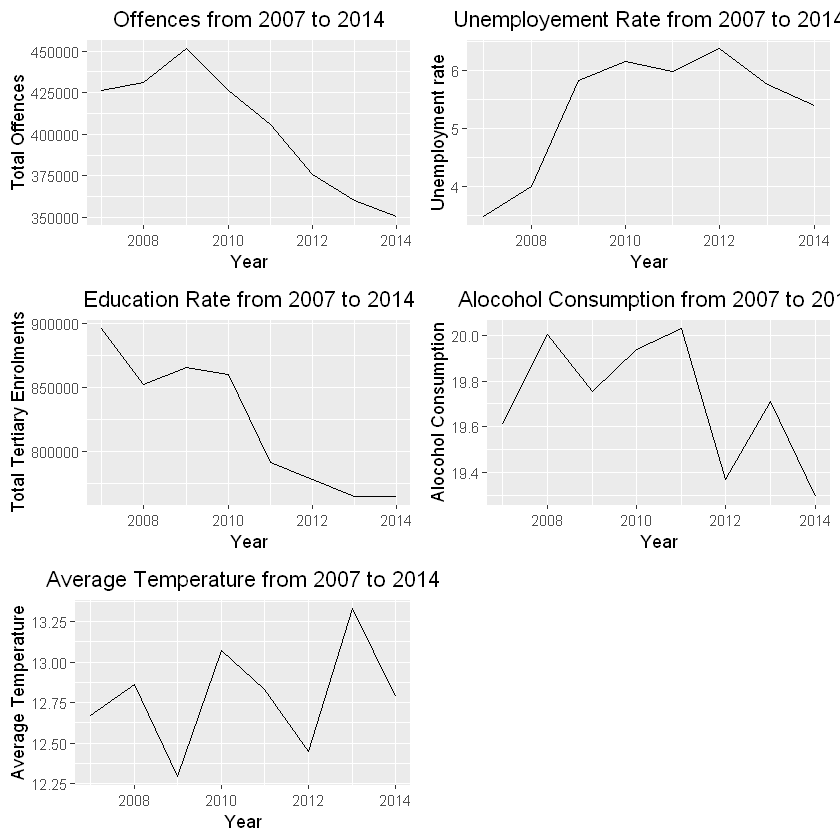

In [87]:
# plotting each factor against years to see their trend

# Offences from 2007 to 2014
p1 <-MergedData %>% ggplot(mapping=aes(x=Year,y=Total.Offences)) +
geom_line()  +
xlab("Year") +
ylab("Total Offences") +
ggtitle("Offences from 2007 to 2014") +
xlim(2007,2014) +
theme(plot.title = element_text(hjust = 0.5))

# Unemployement Rate from 2007 to 2014
p2 <-MergedData %>% ggplot(mapping=aes(x=Year,y=UnemploymentRate)) +
geom_line()  +
xlab("Year") +
ylab("Unemployment rate") +
ggtitle("Unemployement Rate from 2007 to 2014") +
xlim(2007,2014) +
theme(plot.title = element_text(hjust = 0.5))

# Education Rate from 2007 to 2014
p3 <- MergedData %>% ggplot(mapping=aes(x=Year,y=TotalEnrolment)) +
geom_line()  +
xlab("Year") +
ylab("Total Tertiary Enrolments") +
ggtitle("Education Rate from 2007 to 2014") +
xlim(2007,2014) +
theme(plot.title = element_text(hjust = 0.5))

# Alocohol Consumption from 2007 to 2014
p4 <- MergedData %>% ggplot(mapping=aes(x=Year,y=Yearly_alcohol_consumption)) +
geom_line()  +
xlab("Year") +
ylab("Alocohol Consumption") +
ggtitle("Alocohol Consumption from 2007 to 2014") +
xlim(2007,2014) +
theme(plot.title = element_text(hjust = 0.5))

# Average Temperature from 2007 to 2014
p5 <- MergedData %>% ggplot(mapping=aes(x=Year,y=Avg_temperature )) +
geom_line()  +
xlab("Year") +
ylab("Average Temperature") +
ggtitle("Average Temperature from 2007 to 2014") +
xlim(2007,2014) +
theme(plot.title = element_text(hjust = 0.5))
grid.arrange(p1, p2, p3, p4, p5)

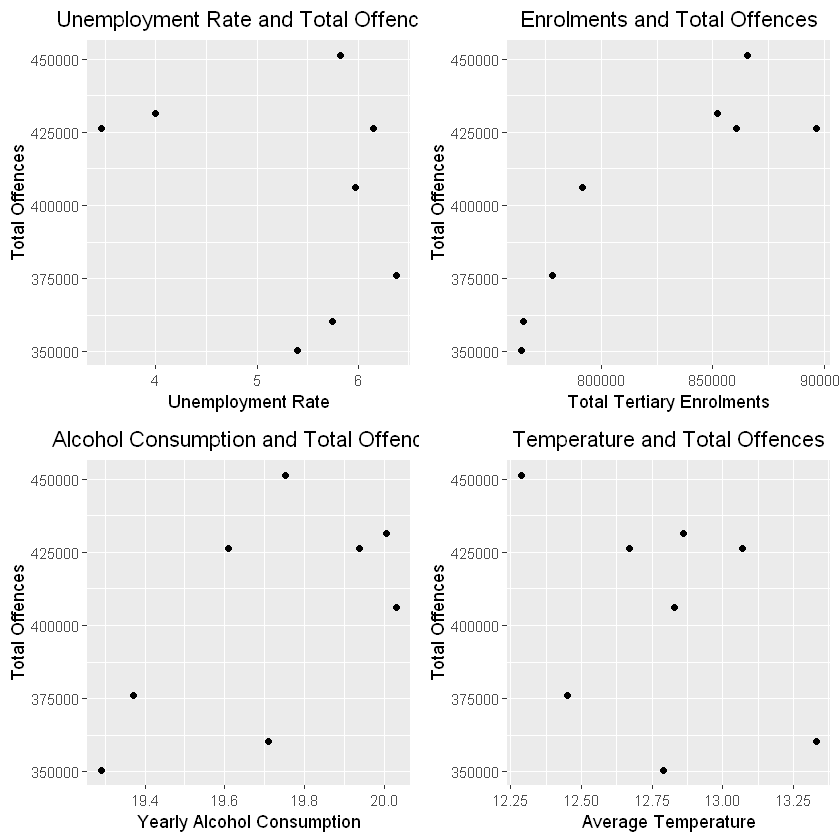

In [88]:
# plotting scatter plot to see the relationship between offences and other factors

# Unemployment Rate and Total Offences
plot1 <- MergedData %>% ggplot(mapping=aes(x=UnemploymentRate,y=Total.Offences)) +
geom_point()  +
xlab("Unemployment Rate") +
ylab("Total Offences") +
ggtitle("Unemployment Rate and Total Offences") +
theme(plot.title = element_text(hjust = 0.5))

# Enrolments and Total Offences
plot2 <- MergedData %>% ggplot(mapping=aes(x=TotalEnrolment,y=Total.Offences)) +
geom_point()  +
xlab("Total Tertiary Enrolments") +
ylab("Total Offences") +
ggtitle("Enrolments and Total Offences") +
theme(plot.title = element_text(hjust = 0.5))

# Alcohol Consumption and Total Offences
plot3 <- MergedData %>% ggplot(mapping=aes(x=Yearly_alcohol_consumption,y=Total.Offences)) +
geom_point()  +
xlab("Yearly Alcohol Consumption") +
ylab("Total Offences") +
ggtitle("Alcohol Consumption and Total Offences") +
theme(plot.title = element_text(hjust = 0.5))

# Temperature and Total Offences
plot4 <- MergedData %>% ggplot(mapping=aes(x=Avg_temperature,y=Total.Offences)) +
geom_point()  +
xlab("Average Temperature") +
ylab("Total Offences") +
ggtitle("Temperature and Total Offences") +
theme(plot.title = element_text(hjust = 0.5))
grid.arrange(plot1, plot2, plot3, plot4)